# 1. Model Inference

Nama: Stanley Armando

Batch: FTDS - 027

Tujuan: Model Inference bertujuan untuk mengevaluasi model terbaik dari hasil analisa model dengan data asli yang belum pernah dipelajari oleh model.

# 2. Import Libraries


In [38]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from keras.models import load_model
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 3. Load Data

Mengambil data dari folder data inference yang sudah di save di google drive. Data inference ini terdiri dari 5 wajah asli manusia dan 5 wajah palsu manusia yang diambil dari this person does not exist.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# load data
data_inf = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Inference",
    shuffle= True,
    batch_size= 1,
    seed= 11
)

Found 10 files belonging to 2 classes.


Data inference berjumlah 10 gambar, 5 diantaranya adalah wajah asli manusia dan 5 wajahpalsu manusia.

In [14]:
# menampilkan nama target dari seluruh kelas
class_names= data_inf.class_names
class_names

['fake', 'real']

kelas 0 adalah kelas 'fake' dan kelas 1 adalah kelas 'real'

# 4. Load Model

Model B adalah best model, maka dari itu model ini diambil untuk digunakan dalam prediksi data inference.

In [33]:
modelB = load_model('/content/drive/MyDrive/modelB.keras')

# 5. Data Inference Prediction

In [31]:
# pembuatan function untuk menaruh hasil prediksi
def predict(model, img):
  img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array= tf.expand_dims(img_array, 0)

  predictions= model.predict(img_array)

  predicted_class= class_names[np.argmax(predictions[0])]

  return predicted_class

In [34]:
# prediksi data inference
modelB.evaluate(data_inf)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7922 - loss: 2.3567


[2.751769542694092, 0.6000000238418579]

Nilai akurasi dari hasil prediksi adalah 60%. Artinya model dapat memprediksi 6 tebakan benar dari 10 gambar. Lebih lanjutnya akan ditampilkan dibawah ini.

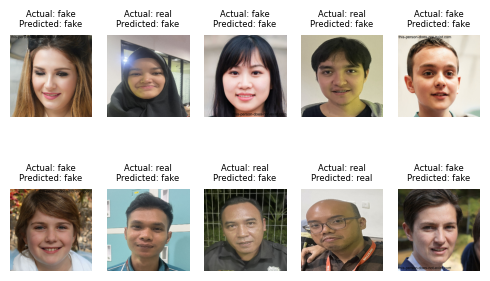

In [35]:
history_pred_class = []
history_actual_class = []
all_images = []

max_samples = 10
collected = 0

# Loop beberapa batch dari test_data sampai dapat 10 sampel
for images, labels in data_inf:
    for i in range(images.shape[0]):
        if collected >= max_samples:
            break

        img_array = images[i].numpy().astype("uint8")
        img_input = np.expand_dims(img_array, axis=0)

        predicted_index = np.argmax(modelB.predict(img_input, verbose=0), axis=1)[0]
        predicted_class = class_names[predicted_index]
        actual_class = class_names[labels[i]]

        history_pred_class.append(predicted_class)
        history_actual_class.append(actual_class)
        all_images.append(img_array)

        collected += 1
    if collected >= max_samples:
        break

# Plot semua gambar
plt.figure(figsize=(5,5))
rows = 3
cols = 5
for i in range(max_samples):
    ax = plt.subplot(rows, cols, i + 1)
    plt.imshow(all_images[i])
    plt.axis("off")
    ax.set_title(f"Actual: {history_actual_class[i]}\nPredicted: {history_pred_class[i]}", fontsize=6)

plt.tight_layout()
plt.show()

Ini adalah hasil prediksi dari 10 data inference. Penjelasan akan dibahas pada bagian confusion matriks.

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix= confusion_matrix(history_actual_class, history_pred_class)
print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
[[5 0]
 [4 1]]


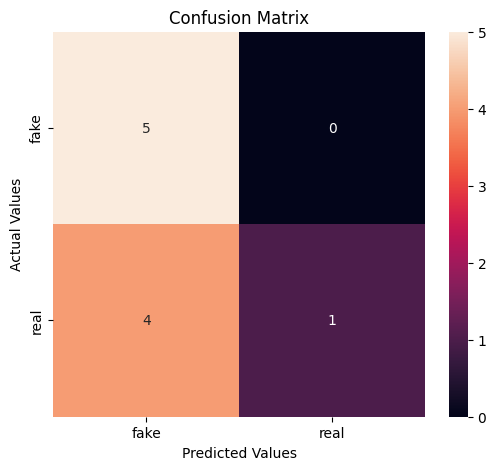

In [39]:
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['fake','real'],
                     columns = ['fake','real'])

#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Dari hasil diatas kita dapat melihat bahwa model berhasil memprediksi dengan benar untuk seluruh gambar wajah manusia palsu sedangkan model hanya berhasil memprediksi 1 gambar wajah manusia asli dengan benar.

---